<a href="https://colab.research.google.com/github/FbnLm/PUC/blob/main/Fabiano_Lima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# Imports necessários (bibliotecas e configurações)
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split #para particionar em base de treino e teste (holdout)
from sklearn.model_selection import KFold #para preparar os folds de validação cruzada
from sklearn.model_selection import cross_val_score #para executar a validação cruzada
from sklearn.metrics import accuracy_score #para a exibição da acurácia do modelo
from sklearn.neighbors import KNeighborsClassifier #algorítimo KNN
from sklearn.tree import DecisionTreeClassifier #algorítimo Árvore de Classificação
from sklearn.naive_bayes import GaussianNB #algorítimo Naive Bayes
from sklearn.svm import SVC #algorítimo SVM
from sklearn.preprocessing import OrdinalEncoder


In [9]:
# Carregando os dados
tabela = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PUC/ObesityDataSet_raw_and_data_sinthetic.csv')
dataset = pd.DataFrame(tabela).round() #faz o arredondamento dos valores numéricos da tabela.

# Criando uma database com seleção de atribjtos
dataset_ds1 = dataset.drop(['SCC', 'family_history_with_overweight', 'TUE', 'CAEC', 'MTRANS'], axis = 1) #cria uma nova nova database excluindo as coluna especificadas.

# Criando uma batabase com seleção de atributos super reduzida
dataset_ds2 = dataset.drop(['Gender', 'CALC', 'FAVC', 'NCP', 'SCC', 'SMOKE', 'CH2O', 'family_history_with_overweight', 'FAF', 'TUE', 'CAEC', 'MTRANS'], axis = 1) #cria uma nova nova database excluindo as coluna especificadas.


In [10]:
# Convertendo os valores não númericos do dataset1

encoder_gender = OrdinalEncoder(categories=[['Male', 'Female']])
dataset_ds1['Gender'] = encoder_gender.fit_transform(dataset_ds1[['Gender']])

# Isolando variáveis contínuas
int_cols = dataset_ds1.select_dtypes(include=['int64']).columns

#  Verificando a correlação das colunas flutuantes com a variável de destino
correlations = dataset_ds1[int_cols].corrwith(dataset_ds1['Gender'])[:-1].sort_values(ascending=False)

encoder_calc = OrdinalEncoder(categories=[['no', 'Sometimes', 'Frequently', 'Always']]) # Frequency of alcohol intake.
dataset_ds1['CALC'] = encoder_calc.fit_transform(dataset_ds1[['CALC']])

# Isolando variáveis contínuas
int_cols = dataset_ds1.select_dtypes(include=['int64']).columns

#  Verificando a correlação das colunas flutuantes com a variável de destino
correlations = dataset_ds1[int_cols].corrwith(dataset_ds1['CALC'])[:-1].sort_values(ascending=False)

encoder_favc = OrdinalEncoder(categories=[['yes', 'no']]) # Consume high-calorie foods frequently
dataset_ds1['FAVC'] = encoder_favc.fit_transform(dataset_ds1[['FAVC']])

# Isolando variáveis contínuas
int_cols = dataset_ds1.select_dtypes(include=['int64']).columns

#  Verificando a correlação das colunas flutuantes com a variável de destino
correlations = dataset_ds1[int_cols].corrwith(dataset_ds1['FAVC'])[:-1].sort_values(ascending=False)

encoder_smoke = OrdinalEncoder(categories=[['yes', 'no']]) # fumante
dataset_ds1['SMOKE'] = encoder_smoke.fit_transform(dataset_ds1[['SMOKE']])

# Isolando variáveis contínuas
int_cols = dataset_ds1.select_dtypes(include=['int64']).columns

#  Verificando a correlação das colunas flutuantes com a variável de destino
correlations = dataset_ds1[int_cols].corrwith(dataset_ds1['SMOKE'])[:-1].sort_values(ascending=False)

encoder_nobd = OrdinalEncoder(categories=[['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']]) # Body mass index
dataset_ds1['NObeyesdad'] = encoder_nobd.fit_transform(dataset_ds1[['NObeyesdad']])

# Isolando variáveis contínuas
int_cols = dataset_ds1.select_dtypes(include=['int64']).columns

#  Verificando a correlação das colunas flutuantes com a variável de destino
correlations = dataset_ds1[int_cols].corrwith(dataset_ds1['NObeyesdad'])[:-1].sort_values(ascending=False)


KNN_1: 0.847126 (0.020893)
CART_1: 0.866698 (0.021591)
NB_1: 0.589479 (0.031684)
SVM_1: 0.558104 (0.033120)


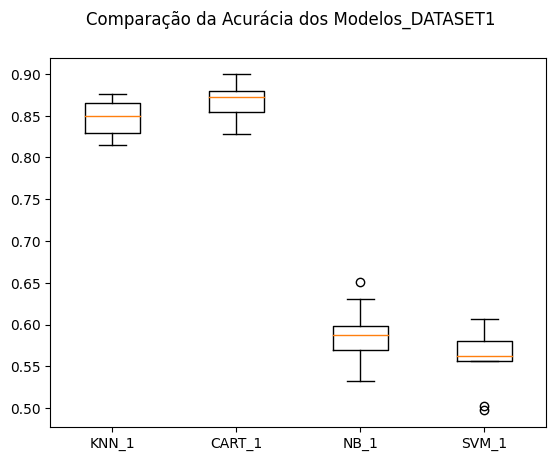

In [11]:
# Preparação dos dados do dataset_ds1

#Separação em bases de treino e teste(holdout) do dataset1
array = dataset_ds1.values
X1 = array[:,0:11]
y1 = array[:,11]

X_trainds1, X_testds1, y_trainds1, y_testds1 = train_test_split(X1, y1, test_size=0.20, random_state=30) #define a proporção de dados de treinamento (80%) e teste (20%).

#Criando os folds para a validação cruzada
num_particoes1 = 10
KFold1 = KFold(n_splits=num_particoes1, shuffle=True, random_state=30)

# Modelagem

# Definindo uma seed global para esta cédula de código
np.random.seed(7)

# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models1 = []
results1 = []
names1 = []

# Preparando os modelos e adicionando-os em uma lista
models1.append(('KNN_1', KNeighborsClassifier()))
models1.append(('CART_1', DecisionTreeClassifier()))
models1.append(('NB_1', GaussianNB()))
models1.append(('SVM_1', SVC()))

# Avaliando um modelo por vez
for name1, model1 in models1:
  cv_results1 = cross_val_score(model1, X_trainds1, y_trainds1, cv=KFold1, scoring='accuracy')
  results1.append(cv_results1)
  names1.append(name1)
  msg = "%s: %f (%f)" % (name1, cv_results1.mean(), cv_results1.std())
  print(msg)

# Bloxolot de comparação dos modelos
fig = plt.figure()
fig.suptitle('Comparação da Acurácia dos Modelos_DATASET1')
ax = fig.add_subplot(111)
plt.boxplot(results1)
ax.set_xticklabels(names1)
plt.show()


KNN_2: 0.781967 (0.022385)
CART_2: 0.803903 (0.024534)
NB_2: 0.531438 (0.035929)
SVM_2: 0.545034 (0.023574)


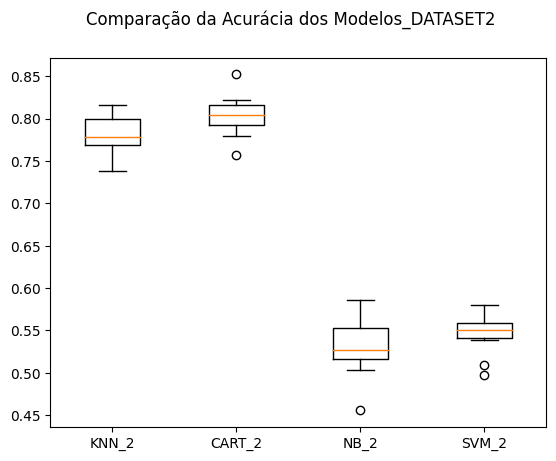

In [12]:
# Preparação dos dados do dataset_ds2

#Separação em bases de treino e teste(holdout) do dataset2
array = dataset_ds2.values
X2 = array[:,0:4]
y2 = array[:,4]

X_trainds2, X_testds2, y_trainds2, y_testds2 = train_test_split(X2, y2, test_size=0.20, random_state=30) #define a proporção de dados de treinamento (80%) e teste (20%).

#Criando os folds para a validação cruzada
num_particoes2 = 10
KFold2 = KFold(n_splits=num_particoes2, shuffle=True, random_state=30)

# Modelagem

# Definindo uma seed global para esta cédula de código
np.random.seed(7)

# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models2 = []
results2 = []
names2 = []

# Preparando os modelos e adicionando-os em uma lista
models2.append(('KNN_2', KNeighborsClassifier()))
models2.append(('CART_2', DecisionTreeClassifier()))
models2.append(('NB_2', GaussianNB()))
models2.append(('SVM_2', SVC()))

# Avaliando um modelo por vez
for name2, model2 in models2:
  cv_results2 = cross_val_score(model2, X_trainds2, y_trainds2, cv=KFold2, scoring='accuracy')
  results2.append(cv_results2)
  names2.append(name2)
  msg = "%s: %f (%f)" % (name2, cv_results2.mean(), cv_results2.std())
  print(msg)

# Bloxolot de comparação dos modelos
fig = plt.figure()
fig.suptitle('Comparação da Acurácia dos Modelos_DATASET2')
ax = fig.add_subplot(111)
plt.boxplot(results2)
ax.set_xticklabels(names2)
plt.show()

In [13]:
# Criando um modelo com todo o conjunto de treino
model1 = GaussianNB()
model1.fit(X_trainds1, y_trainds1)

model2 = GaussianNB()
model2.fit(X_trainds2, y_trainds2)

# Fazendo as predições com o conjunto de teste
predictions1 = model1.predict(X_testds1)
predictions2 = model2.predict(X_testds2)

# Estimando a acurácia no conjunto de teste
print("DATASET1:", accuracy_score(y_testds1,predictions1))
print("DATASET2:", accuracy_score(y_testds2,predictions2))

DATASET1: 0.5910165484633569
DATASET2: 0.5342789598108747


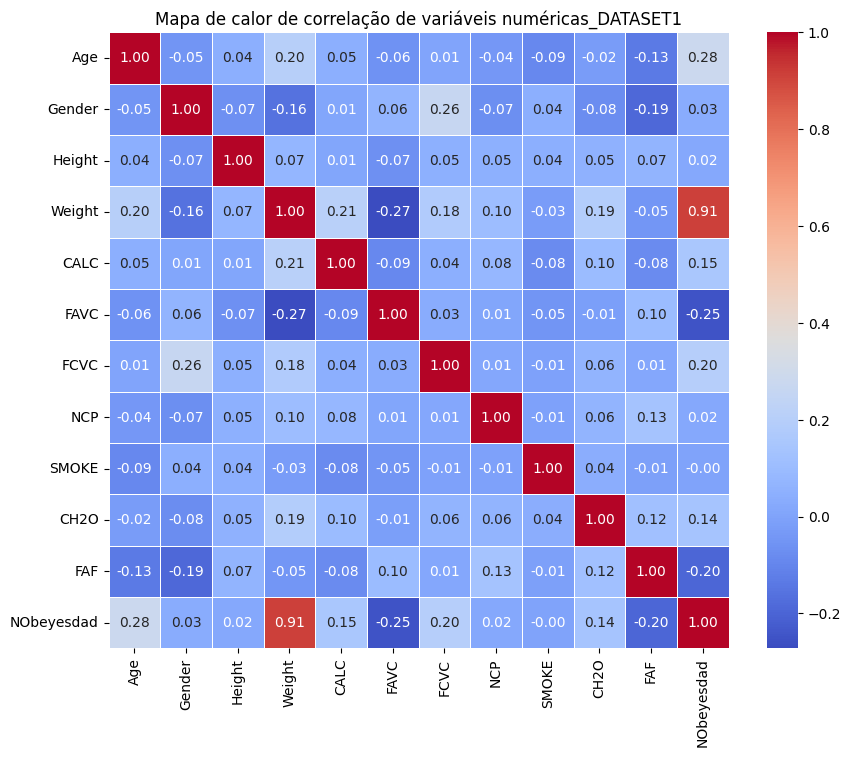

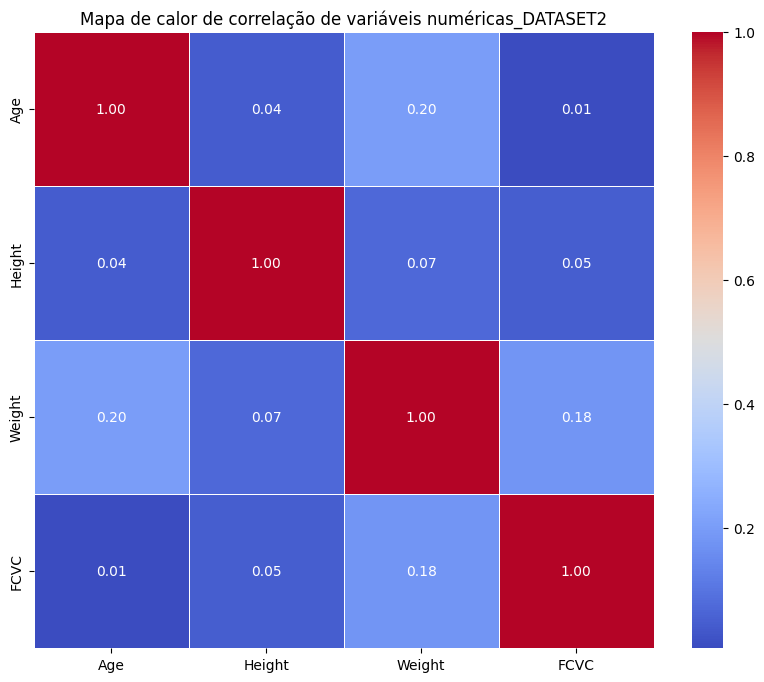

In [14]:
import seaborn as sns

numerical_cols1 = dataset_ds1.select_dtypes(include='number')
correlation_matrix = numerical_cols1.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Mapa de calor de correlação de variáveis numéricas_DATASET1')
plt.show()

numerical_cols2 = dataset_ds2.select_dtypes(include='number')
correlation_matrix = numerical_cols2.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Mapa de calor de correlação de variáveis numéricas_DATASET2')
plt.show()